# Vaje 6: Rezanje odločitvenih dreves in ansambli

## Naloga 1: Rezanje dreves

In [2]:
import numpy as np

np.random.seed(18)
X = np.random.random(size=(1000, 9))
y = 1 + X[:, 0] - 2* X[:, 4] + 5 * (X[:, 3] * X[:, 4] - X[:, 5]*X[:, 8]) + np.random.normal(scale=5)
y = y > y.mean() 

1.a: Preveri točnost odločilnih dreves na napovednih spremenljivkah $X$ in ciljnih vrednostih $y$.

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

np.random.seed(42)

kf = KFold(n_splits=5, shuffle=True)
scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    print("Accuracy: ", accuracy_score(y_test, y_pred))

print("Average accuracy: ", np.mean(scores))

Accuracy:  0.89
Accuracy:  0.875
Accuracy:  0.875
Accuracy:  0.87
Accuracy:  0.835
Average accuracy:  0.8690000000000001


1.b: S sprotnim rezanjem poskrbi, da se naučen napovedn model ne bo preprilegal podatkom. Uporabi parameter `min_samples_split`, ki določi najmanjše število primerov v listu pri katerem se list naprej deli.

Average accuracy (min_samples_split=1):  0.8939999999999999
Average accuracy (min_samples_split=2):  0.8879999999999999
Average accuracy (min_samples_split=3):  0.8960000000000001
Average accuracy (min_samples_split=4):  0.8949999999999999
Average accuracy (min_samples_split=5):  0.8640000000000001
Average accuracy (min_samples_split=6):  0.8800000000000001
Average accuracy (min_samples_split=7):  0.875
Average accuracy (min_samples_split=8):  0.8800000000000001
Average accuracy (min_samples_split=9):  0.865
Average accuracy (min_samples_split=10):  0.874
Average accuracy (min_samples_split=11):  0.869
Average accuracy (min_samples_split=12):  0.85
Average accuracy (min_samples_split=13):  0.8539999999999999
Average accuracy (min_samples_split=14):  0.877
Average accuracy (min_samples_split=15):  0.858
Average accuracy (min_samples_split=16):  0.8480000000000001
Average accuracy (min_samples_split=17):  0.8619999999999999
Average accuracy (min_samples_split=18):  0.837
Average accuracy

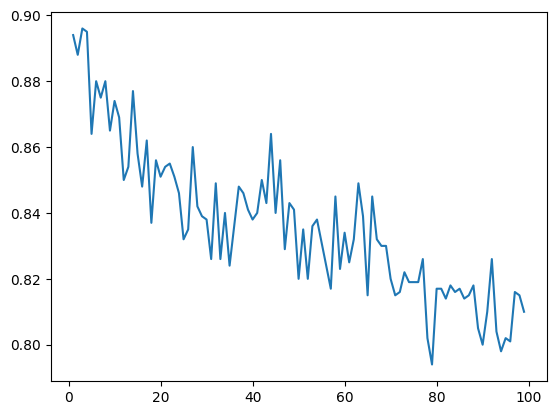

In [11]:

listScores = []
for i in range(1, 100):
    clf = DecisionTreeClassifier(min_samples_leaf=i)
    scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores.append(accuracy_score(y_test, y_pred))
    print(f"Average accuracy (min_samples_split={i}): ", np.mean(scores))
    listScores.append(np.mean(scores))

import matplotlib.pyplot as plt

plt.plot(range(1, 100), listScores)



1.c: Najdi ustrezno vrednost parametra cp (`ccp_alpha` v sklearn) za naknadno rezanje odločitvenega drevesa.

Average accuracy (ccp_alpha=0):  0.8690000000000001
Average accuracy (ccp_alpha=0.01):  0.8949999999999999
Average accuracy (ccp_alpha=0.02):  0.875
Average accuracy (ccp_alpha=0.03):  0.89
Average accuracy (ccp_alpha=0.05):  0.881
Average accuracy (ccp_alpha=0.1):  0.883
Average accuracy (ccp_alpha=0.2):  0.85
Average accuracy (ccp_alpha=0.5):  0.821
Average accuracy (ccp_alpha=1):  0.8130000000000001


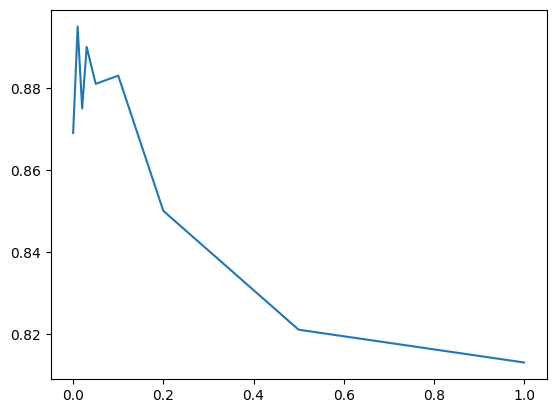

In [17]:
np.random.seed(42)

listScores = []
for a in [0, 0.01, 0.02, 0.03, 0.05, 0.1, 0.2, 0.5, 1]:
    clf = DecisionTreeClassifier(ccp_alpha=a/20)
    scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores.append(accuracy_score(y_test, y_pred))
    print(f"Average accuracy (ccp_alpha={a}): ", np.mean(scores))
    listScores.append(np.mean(scores))

plt.plot([0, 0.01, 0.02, 0.03, 0.05, 0.1, 0.2, 0.5, 1], listScores)



## Naloga 2: Naključni gozd

2.a: Na podatkih iz naloge 1 preizkusi točnost napovednega modela naključnega gozda. Preveri še kako dobro lahko točnost preverimo na OOB množici (parameter `oob_score` in atribut `oob_score_`).

<details>
  <summary>Namig:</summary>

  *Pomagaj si z [modelom sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).
   
</details>

In [19]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

scores = []
OOBscores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = RandomForestClassifier(oob_score=True)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("OOB score: ", clf.oob_score_)
    scores.append(accuracy_score(y_test, y_pred))
    OOBscores.append(clf.oob_score_)


print("Average accuracy: ", np.mean(scores))
print("Average OOB score: ", np.mean(OOBscores))



Accuracy:  0.94
OOB score:  0.91125
Accuracy:  0.945
OOB score:  0.92
Accuracy:  0.9
OOB score:  0.92625
Accuracy:  0.945
OOB score:  0.9175
Accuracy:  0.95
OOB score:  0.92375
Average accuracy:  0.9359999999999999
Average OOB score:  0.91975


2.b: Nariši grafa, ki prikazujeta kako se točnost (in točnost na OOB množici) spreminjajo glede na število dreves (`n_estimators`) in parameter mtry (`max_features`)

2.c: Natreniraj model naključnega gozda na vseh podatkih, preveri njegovo točnost na OOB množici in poglej relevantnost spremenljivk (atribut `feature_importances_`). Se relevantnost spremenljivk ujema z definicijo ciljne funkcije $1 + X_1 - 2* X_5 + 5 * (X_4 * X_5 - X_6*X_9)$?

## Naloga 3: Vrečenje (Bagging)

3.a: Preizkusi model vrečenja z modelom odločitvenega drevesa. Kako se model primerja z modelom naključnega gozda?

3.b: Na podoben način lahko vrečimo tudi druge modele. Preveri točnost ansambla, ki ga sestavimo iz modelov podpornih vektorjev in ansambel modelov logistične regresije. Kako se točnost ansambla primerja z posameznim modelom podpornih vektorjev/logistične regresije?